In [130]:
import pandas as pd

# Import data

In [131]:
df = pd.read_csv('stationary_data.csv')

In [132]:
df.head()

,start,close_price,tweet_count,twitter_sentiment,volume,volatility,rsi,macd,reddit_sentiment,reddit_post_count
0,2018-01-03,-0.078084,0.068450,6.096648,2.529997e+07,-0.141918,0.016552,30.100003,0.213028,-104.0
1,2018-01-04,0.011353,-0.066855,4.738479,4.911300e+09,-0.021054,0.030055,53.719591,-0.833220,-17.0
2,2018-01-05,0.085086,-0.084542,5.809624,2.057699e+09,0.243666,0.114442,185.854342,0.342103,48.0
3,2018-01-06,-0.105366,-0.246690,6.643630,-5.526299e+09,0.163605,0.005255,149.031677,-0.065387,-185.0
4,2018-01-07,-0.067319,0.091045,8.091246,-2.448600e+09,0.006811,-0.090538,26.993014,0.184959,53.0


## imputer

In [133]:
from sklearn.impute import KNNImputer

In [134]:
imputer = KNNImputer(n_neighbors=2)
df['reddit_sentiment'],df['reddit_post_count'],df['twitter_sentiment'] = imputer.fit_transform(df[['reddit_sentiment','reddit_post_count','twitter_sentiment']]).T

## Train test split

In [135]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

# mpl.rcParams['figure.figsize'] = (8, 6)
# mpl.rcParams['axes.grid'] = False

In [136]:

def train_test_split(df):
    column_indices = {name: i for i, name in enumerate(df.columns)}

    n = len(df)
    train_df = df[0:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]

    num_features = df.shape[1]
    
    return train_df,val_df,val_df,test_df,num_features

In [137]:
train_df,val_df,val_df,test_df,num_features = train_test_split(df)

In [138]:
train_df=train_test_split(df)[0].copy()
train_df

,start,close_price,tweet_count,twitter_sentiment,volume,volatility,rsi,macd,reddit_sentiment,reddit_post_count
0,2018-01-03,-0.078084,0.068450,6.096648,2.529997e+07,-0.141918,0.016552,30.100003,0.213028,-104.0
1,2018-01-04,0.011353,-0.066855,4.738479,4.911300e+09,-0.021054,0.030055,53.719591,-0.833220,-17.0
2,2018-01-05,0.085086,-0.084542,5.809624,2.057699e+09,0.243666,0.114442,185.854342,0.342103,48.0
3,2018-01-06,-0.105366,-0.246690,6.643630,-5.526299e+09,0.163605,0.005255,149.031677,-0.065387,-185.0
4,2018-01-07,-0.067319,0.091045,8.091246,-2.448600e+09,0.006811,-0.090538,26.993014,0.184959,53.0
...,...,...,...,...,...,...,...,...,...,...
900,2020-07-22,-0.006803,0.060790,1.814096,-1.537327e+09,0.195655,0.093068,25.484189,-0.445606,4.0
901,2020-07-23,-0.010092,0.065341,0.361671,1.614144e+09,0.278486,0.029136,24.355597,-0.059563,-16.0
902,2020-07-24,-0.010453,-0.038496,0.295054,-1.593631e+09,0.121754,-0.039523,15.225488,0.336210,30.0
903,2020-07-25,0.019218,-0.120173,0.827391,5.730261e+07,0.181845,0.072545,22.608763,0.253557,-26.0


### Standarize

#### don't standardize the target?

In [139]:
train_mean=train_df[['tweet_count','twitter_sentiment','volume','volatility','rsi','macd','reddit_sentiment','reddit_post_count']].mean()
train_std=train_df[['tweet_count','twitter_sentiment','volume','volatility','rsi','macd','reddit_sentiment','reddit_post_count']].std()




In [140]:
train_std

tweet_count          1.695120e-01
twitter_sentiment    1.733302e+00
volume               4.077819e+09
volatility           1.709044e-01
rsi                  1.116498e-01
macd                 4.567792e+01
reddit_sentiment     3.802587e-01
reddit_post_count    8.250881e+01
dtype: float64

In [141]:
# train_df[['tweet_count','twitter_sentiment','volume','volatility','rsi','macd','reddit_sentiment','reddit_post_count']]=(train_df[['tweet_count','twitter_sentiment','volume','volatility','rsi','macd','reddit_sentiment','reddit_post_count']]-train_mean)/train_std

# val_df[['tweet_count','twitter_sentiment','volume','volatility','rsi','macd','reddit_sentiment','reddit_post_count']]=(val_df[['tweet_count','twitter_sentiment','volume','volatility','rsi','macd','reddit_sentiment','reddit_post_count']]-train_mean)/train_std

# test_df[['tweet_count','twitter_sentiment','volume','volatility','rsi','macd','reddit_sentiment','reddit_post_count']]=(test_df[['tweet_count','twitter_sentiment','volume','volatility','rsi','macd','reddit_sentiment','reddit_post_count']]-train_mean)/train_std


In [142]:
val_df

,start,close_price,tweet_count,twitter_sentiment,volume,volatility,rsi,macd,reddit_sentiment,reddit_post_count
905,2020-07-27,0.080716,0.594926,2.109560,1.485175e+10,0.713157,0.171750,112.978343,-0.119792,0.5
906,2020-07-28,-0.111135,-0.143009,1.801031,-6.593198e+09,0.221372,-0.035422,79.838229,0.124545,1.5
907,2020-07-29,0.024175,-0.272110,1.441959,-4.149301e+09,0.154931,0.018315,74.158906,0.884054,35.5
908,2020-07-30,-0.016081,-0.074482,2.339675,-1.760002e+09,0.082990,0.001021,54.752621,-1.090101,4.0
909,2020-07-31,0.017955,0.093953,2.227811,3.032219e+08,0.069944,0.019306,54.998925,0.721890,66.0
...,...,...,...,...,...,...,...,...,...,...
1158,2021-04-15,-0.061515,-0.076006,1.673382,-9.029073e+09,0.299198,-0.016517,317.681119,0.034741,-52.5
1159,2021-04-16,-0.024899,-0.101742,0.972841,2.333863e+10,0.023936,-0.109429,-52.531316,-0.161548,-5.0
1160,2021-04-17,0.013344,-0.246994,1.784145,-1.815425e+10,-0.037416,-0.055426,-132.885174,0.166099,-55.0
1161,2021-04-18,-0.061930,0.454232,0.490951,3.133011e+10,0.090793,-0.256050,-479.803901,-0.077645,110.0


In [145]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/tmp/ipykernel_19271/1429736173.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_mean = train_df.mean()
/tmp/ipykernel_19271/1429736173.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_std = train_df.std()


In [146]:
train_mean

close_price         -7.657057e-05
tweet_count         -9.431487e-04
twitter_sentiment    4.868430e+00
volume               4.045745e+06
volatility          -1.625830e-03
rsi                  3.539409e-04
macd                -1.177125e-02
reddit_sentiment    -1.306929e-03
reddit_post_count   -1.290079e+00
dtype: float64

# Model?

## Creating datasets

In [147]:
train_df.shape

(905, 10)

In [148]:
test_df.shape

(130, 10)

In [149]:
sequence_length = 7

In [150]:
train_df['target'] = train_df['close_price'].shift(-sequence_length)

In [151]:
train_df.drop('start', axis = 1, inplace = True)

In [152]:
train_df.dropna()

,close_price,macd,reddit_post_count,reddit_sentiment,rsi,tweet_count,twitter_sentiment,volatility,volume,target
0,-1.282915,0.659219,-1.244836,0.563656,0.145075,0.409370,0.708600,-0.820883,0.005212,1.056800
1,0.187977,1.176309,-0.190403,-2.187755,0.266023,-0.388832,-0.074973,-0.113681,1.203402,-2.237758
2,1.400588,4.069058,0.597392,0.903096,1.021837,-0.493172,0.543006,1.435256,0.503616,2.510337
3,-1.731595,3.262921,-2.226549,-0.168516,0.043896,-1.449731,1.024172,0.966801,-1.356202,-0.248610
4,-1.105872,0.591200,0.657991,0.489839,-0.814077,0.542666,1.859351,0.049367,-0.601460,-1.127149
...,...,...,...,...,...,...,...,...,...,...
893,0.058953,0.013762,-0.578240,-0.571180,-0.005860,0.982887,-1.434736,-0.163125,0.137616,-0.110625
894,-0.087907,-0.071556,0.645871,-1.534328,-0.360344,7.794126,-2.789252,0.042164,-0.550381,-0.164714
895,-0.017652,-0.155452,-1.305435,0.530168,-0.445726,-0.612211,-2.407624,-0.030022,-0.033059,-0.170655
896,0.144526,-0.080090,0.209554,1.456391,0.175874,-6.587683,-1.985591,-0.329861,-0.434900,0.317315


In [153]:
X_train = train_df.drop('target', axis = 1)
y_train = train_df['target']

In [154]:
dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_train, y_train, sequence_length=10, batch_size = 16)


In [155]:
exx, exxy = next(iter(dataset))

In [156]:
exxy

<tf.Tensor: shape=(16,), dtype=float64, numpy=
array([ 1.05679971, -2.23775785,  2.51033709, -0.24861039, -1.1271494 ,
        0.74606285, -3.09135903,  2.59901617,  0.85467572, -0.22546441,
        1.5478712 , -3.47993858,  0.77056102,  0.88267402,  0.82300126,
       -0.87084659])>

In [157]:
train_df.iloc[:10]

,close_price,macd,reddit_post_count,reddit_sentiment,rsi,tweet_count,twitter_sentiment,volatility,volume,target
0,-1.282915,0.659219,-1.244836,0.563656,0.145075,0.409370,0.708600,-0.820883,0.005212,1.056800
1,0.187977,1.176309,-0.190403,-2.187755,0.266023,-0.388832,-0.074973,-0.113681,1.203402,-2.237758
2,1.400588,4.069058,0.597392,0.903096,1.021837,-0.493172,0.543006,1.435256,0.503616,2.510337
3,-1.731595,3.262921,-2.226549,-0.168516,0.043896,-1.449731,1.024172,0.966801,-1.356202,-0.248610
4,-1.105872,0.591200,0.657991,0.489839,-0.814077,0.542666,1.859351,0.049367,-0.601460,-1.127149
5,-0.343035,-1.959509,2.572938,0.280390,-0.987329,1.151345,-0.668360,-0.184221,0.623827,0.746063
6,0.725799,-2.655829,-1.281196,-0.540476,-0.433820,0.538181,0.855073,-0.026156,-0.431100,-3.091359
7,1.056800,-1.507488,-0.505521,1.080213,0.307582,0.209730,-0.650843,-0.044257,0.450426,2.599016
8,-2.237758,-3.988060,1.118548,-1.073881,-1.205913,0.811707,0.019531,0.342525,-0.483284,0.854676
9,2.510337,-2.144758,-2.299269,-0.547355,0.537809,-1.164093,1.101803,0.122919,-1.096774,-0.225464


In [158]:
exx;

In [159]:
test_df['target'] = test_df['close_price'].shift(-sequence_length)

In [160]:
#test_df.drop('start', axis = 1, inplace = True)

In [161]:
X_test = test_df.drop('target', axis = 1)
y_test = test_df['target']

In [162]:
X_test.drop('start', axis = 1, inplace = True)

In [163]:
dataset_test = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_test, y_test, sequence_length=10)

In [164]:
etx, ety = next(iter(dataset_test))

In [165]:
val_df['target'] = val_df['close_price'].shift(-sequence_length)

In [166]:
val_df.drop('start', axis = 1, inplace = True)

In [167]:
X_val = val_df.drop('target', axis = 1)
y_val =val_df['target']

In [168]:
dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_val, y_val, sequence_length=10)

In [169]:
evx, evy = next(iter(dataset_val))

In [170]:
len(dataset_test)

1

## train model

In [171]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(50, return_sequences=True),
    tf.keras.layers.GRU(20),
    #tf.keras.layers.Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=20),
    
    tf.keras.layers.Dense(units=1)
    # Adding a second LSTM layer and some Dropout regularisation
])

# regularization?
# GRU layer

In [172]:
lstm_model.compile(optimizer = 'Adam', loss = 'mae')

In [173]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [174]:
es = EarlyStopping(patience = 20, restore_best_weights=True)

In [175]:
reduce_lr = ReduceLROnPlateau(patience = 15)

In [176]:
lstm_model.fit(dataset, validation_data = dataset_val, epochs = 2_000, callbacks = [es, reduce_lr])

Epoch 1/2000
56/56 [==============================] - 7s 48ms/step - loss: 0.6682 - val_loss: 0.6422
Epoch 2/2000
56/56 [==============================] - 2s 36ms/step - loss: 0.6566 - val_loss: 0.6360
Epoch 3/2000
56/56 [==============================] - 2s 30ms/step - loss: 0.6519 - val_loss: 0.6385
Epoch 4/2000
56/56 [==============================] - 2s 30ms/step - loss: 0.6434 - val_loss: 0.6466
Epoch 5/2000
56/56 [==============================] - 1s 27ms/step - loss: 0.6345 - val_loss: 0.6666
Epoch 6/2000
56/56 [==============================] - 2s 27ms/step - loss: 0.6196 - val_loss: 0.6534
Epoch 7/2000
56/56 [==============================] - 1s 24ms/step - loss: 0.5835 - val_loss: 0.6323
Epoch 8/2000
56/56 [==============================] - 1s 22ms/step - loss: 0.3918 - val_loss: 0.3290
Epoch 9/2000
56/56 [==============================] - 1s 23ms/step - loss: 0.2044 - val_loss: 0.3030
Epoch 10/2000
56/56 [==============================] - 1s 25ms/step - loss: 0.1572 - val_lo

In [106]:
lstm_model.evaluate(dataset_test)

1/1 [==============================] - 0s 176ms/step - loss: 0.0564


0.05635538697242737

In [177]:
y_pred = lstm_model.predict(dataset_test)

In [178]:
y_pred

array([[-1.6871494e+00],
       [-4.8863816e-01],
       [-3.9712474e-01],
       [ 1.0383837e+00],
       [-1.5584723e+00],
       [-6.3938004e-01],
       [ 2.6550025e-01],
       [-1.0760517e+00],
       [ 2.3277233e+00],
       [-1.2847688e+00],
       [ 3.7897599e-01],
       [-4.9973577e-01],
       [-8.2590365e-01],
       [-4.8678559e-01],
       [ 2.3616399e-01],
       [-1.4921919e+00],
       [ 1.5287282e+00],
       [-6.6178304e-01],
       [ 6.1278057e-01],
       [-5.0035822e-01],
       [ 2.8878284e-01],
       [-9.2414355e-01],
       [ 2.4807150e+00],
       [-2.5379953e+00],
       [ 2.0811946e+00],
       [-6.7531669e-01],
       [ 2.8340633e+00],
       [-1.9568243e+00],
       [ 1.7490849e-01],
       [-1.1183825e+00],
       [-6.0501146e-01],
       [ 7.1411198e-01],
       [ 8.1991899e-01],
       [-6.4256206e-02],
       [-9.0030503e-01],
       [ 3.6150134e-01],
       [-1.2124092e-01],
       [-1.5403357e+00],
       [ 3.4348989e-01],
       [ 5.5704588e-01],


In [179]:
etx, ety = next(iter(dataset_test))

In [180]:
y_test = ety.numpy()

In [184]:
y_pred = y_pred*train_std['close_price']+train_mean['close_price']

In [188]:
display(train_std['close_price'])
display(train_mean['close_price'])

0.06080495335661146

-7.65705661641187e-05

In [185]:
y_test = y_test*train_std['close_price']+train_mean['close_price']

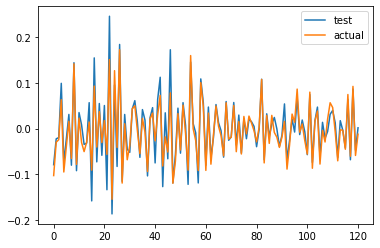

In [186]:
plt.plot(y_test, label = 'test')
plt.plot(y_pred, label = 'actual')
plt.legend()

In [187]:
((y_pred.flatten() > 0) == (y_test>0)).mean()

0.8760330578512396

In [115]:
y_pred.flatten()>0

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False])

In [116]:
from tensorflow.keras import models

In [117]:
lstm_model.save('lstm_gru_7_9')

2021-09-08 09:39:03.369920: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: lstm_gru_7_9/assets


INFO:tensorflow:Assets written to: lstm_gru_7_9/assets


In [118]:
loaded_model = models.load_model('lstm_gru_7_9')

KeyboardInterrupt: 

In [ ]:
loaded_model.summary()